In [24]:
# Load Python Libraries
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [2]:
# Create CAS Connection
conn = swat.CAS(host, portnum, protocol='http')

In [3]:
# Load CAS Action Sets
conn.loadactionset('pca')
conn.loadactionset('tsne');

NOTE: Added action set 'pca'.
NOTE: Added action set 'tsne'.


In [57]:
# Load Original Data
# Previous data prep was done by joining the character death and character prediction datasets

gotData = pd.read_csv('/Users/anviol/Desktop/game-of-thrones/gotData.csv')
gotData['ID'] = gotData.index

gotData = gotData.drop(gotData.index[gotData.Allegiances == 'None'])

In [58]:
# Preview Data
gotData.head()

,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,...,Free Folk,Valyrian,Braavos,Dornish,Vale,Westerman,Ghiscari,Dothraki,Riverlands,ID
0,Addam Marbrand,House Lannister,56.0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Aegon I Targaryen,House Targaryen,5.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Aemond Targaryen,Night's Watch,21.0,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,2
4,Aeron Greyjoy,House Greyjoy,11.0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,4
5,Aethan,Night's Watch,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5


In [59]:
# Load to CAS
gotData = conn.upload_frame(gotData, casout=dict(name='gotData', replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table GOTDATA in caslib CASUSER(anviol).
NOTE: The table GOTDATA has been created in caslib CASUSER(anviol) from binary data uploaded to Cloud Analytic Services.


In [60]:
# Perform PCA

pca_inputs = list(gotData.drop(['Name','Allegiances','ID'], axis=1))

pca_out = conn.eig(table='gotData',
                      n=5,
                      inputs=pca_inputs,
                      output={'casOut':{'name':'pca_out','replace':'TRUE'},
                              'copyVars':['ID','Allegiances','Name']})

In [61]:
# Display Eigenvalues & Explained Variance Percentage of Top 5 Components
pca_out.Eigenvalues[0:5]

,Number,Eigenvalue,Difference,Proportion,Cumulative
0,1,4.868705,2.072699,0.152147,0.152147
1,2,2.796006,0.636259,0.087375,0.239522
2,3,2.159747,0.209663,0.067492,0.307014
3,4,1.950084,0.274920,0.060940,0.367954
4,5,1.675164,NaN,0.052349,0.420303


In [62]:
# Move Scored Dataframes to Pandas Dataframes for Plotting
pca_out = conn.fetch(table='pca_out', maxrows=len(gotData), to=len(gotData))
pca_out = pd.DataFrame(pca_out['Fetch'])

In [63]:
pca_out.head()

,ID,Allegiances,Name,Score1,Score2,Score3,Score4,Score5
0,0.0,House Lannister,Addam Marbrand,-1.503646,-1.174479,2.828987,-0.304786,0.769121
1,1.0,House Targaryen,Aegon I Targaryen,-2.983384,0.555853,-3.841269,1.463085,-4.038549
2,2.0,Night's Watch,Aemond Targaryen,-2.878061,0.508353,-2.961793,2.501894,-2.875488
3,4.0,House Greyjoy,Aeron Greyjoy,-4.624675,1.259740,-0.125515,3.332659,-0.561430
4,5.0,Night's Watch,Aethan,2.193617,0.143882,-0.540150,-0.984711,-1.443907


<IPython.core.display.Javascript object>


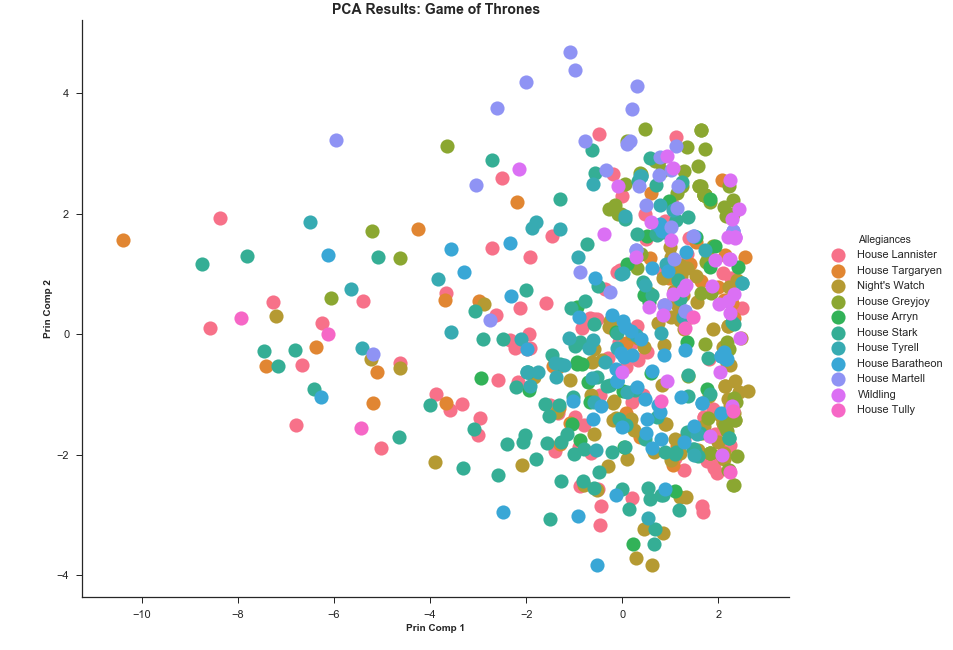

In [65]:
# Plot PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=pca_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Allegiances',
           scatter_kws={"s":200, "alpha":1.0})

plt.title('PCA Results: Game of Thrones', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [87]:
# t-SNE Inputs
tSne_inputs = list(gotData.drop(['Name','Allegiances','ID', 'Book Intro Chapter', 'book1', 'book2',
                                 'book3', 'book4', 'book5', 'isPopular'], axis=1))

#                                  ['#N/A', 'Northmen', 'Ironmen', 'Free Folk', 'Valyrian', 'Braavos',
#                                   'Dornish', 'Vale', 'Westerman', 'Ghiscari', 'Dothraki', 'Riverlands',
#                                   'isNoble', 'Gender']

In [88]:
# Perform t-SNE
tsne_out = conn.tSne(table='gotData',
                        inputs = tSne_inputs,
                        nDimensions = 2,
                        maxIters = 1000,
                        perplexity = 100,
                        learningRate = 1000,
                        seed = 24680,
                        output={'casOut':{'name':'tsne_out','replace':'TRUE'},
                                'copyVars':['ID','Allegiances','Name']})

NOTE:  Using SEED=24680.
NOTE:  Data reading complete.
NOTE:  >>> Progress: completed iteration 100  ::: Loss = 34.157665774
NOTE:  >>> Progress: completed iteration 200  ::: Loss = 33.71176029
NOTE:  >>> Progress: completed iteration 300  ::: Loss = 0.0183386035
NOTE:  >>> Progress: completed iteration 400  ::: Loss = 0.0183333487
NOTE:  >>> Progress: completed iteration 500  ::: Loss = 0.0183333487
NOTE:  >>> Progress: completed iteration 600  ::: Loss = 0.0183333487
NOTE:  >>> Progress: completed iteration 700  ::: Loss = 0.0183333487
NOTE:  >>> Progress: completed iteration 800  ::: Loss = 0.0183333487
NOTE:  >>> Progress: completed iteration 900  ::: Loss = 0.0183333487
NOTE:  >>> Progress: completed iteration 1000  ::: Loss = 0.0183333487
NOTE:  Model output table complete.


In [89]:
# Move Scored Dataframes to Pandas Dataframes for Plotting
tsne_out = conn.fetch(table='tsne_out', maxrows=len(gotData), to=len(gotData))
tsne_out = pd.DataFrame(tsne_out['Fetch'])

In [90]:
tsne_out.head()

,ID,Allegiances,Name,_DIM_1_,_DIM_2_
0,0.0,House Lannister,Addam Marbrand,-0.015563,-0.481394
1,1.0,House Targaryen,Aegon I Targaryen,1.096962,0.109160
2,2.0,Night's Watch,Aemond Targaryen,0.771624,0.058921
3,4.0,House Greyjoy,Aeron Greyjoy,0.753367,0.045345
4,5.0,Night's Watch,Aethan,-0.294691,0.065909


<IPython.core.display.Javascript object>


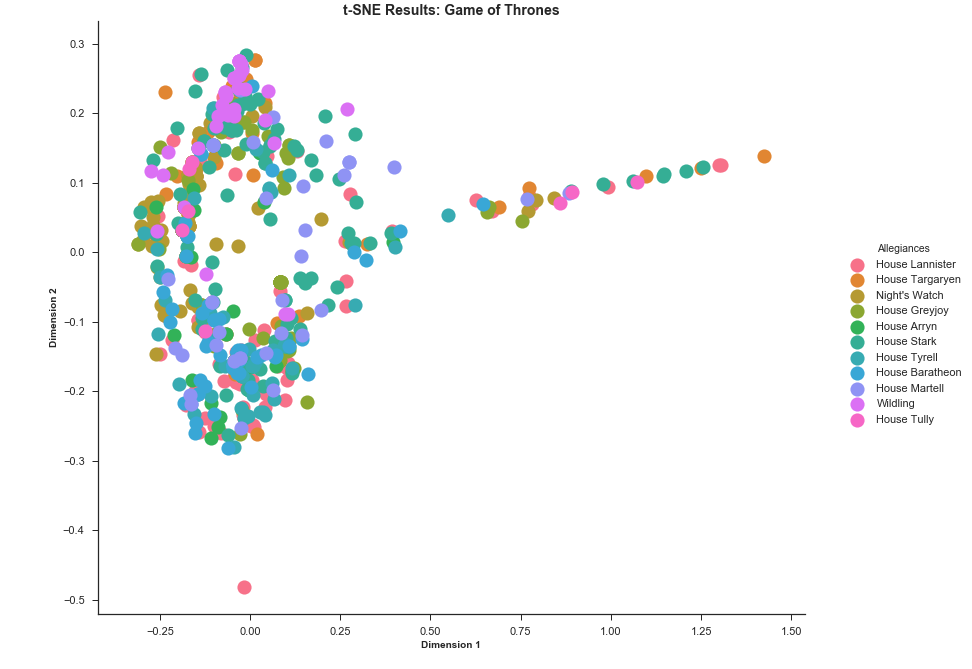

In [91]:
# Interactive Plot
%matplotlib notebook

# Plot t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=tsne_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Allegiances',
           scatter_kws={"s":200, "alpha":1.0})

plt.title('t-SNE Results: Game of Thrones', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')